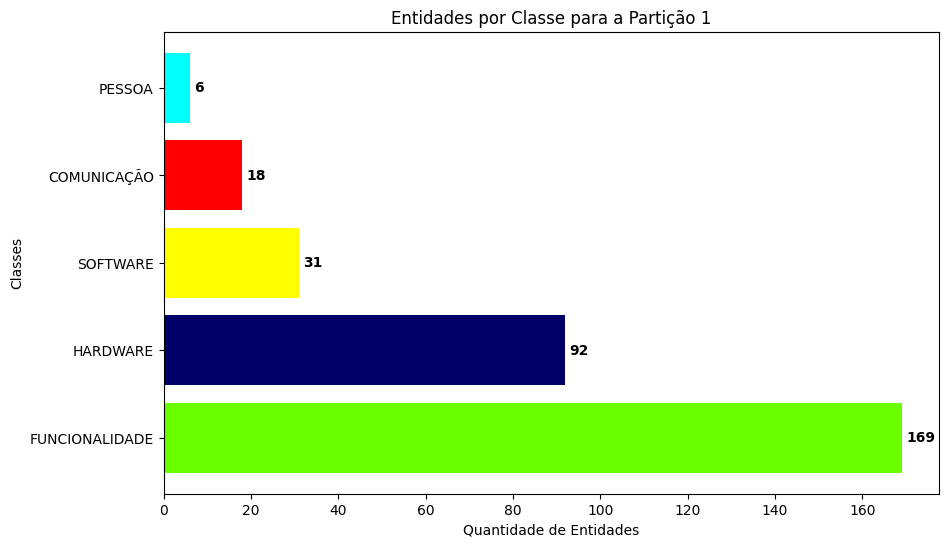

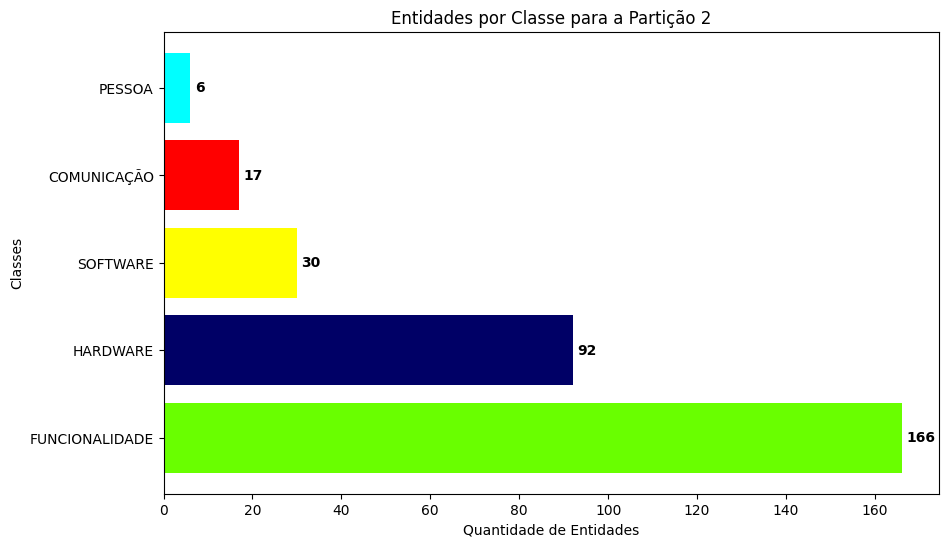

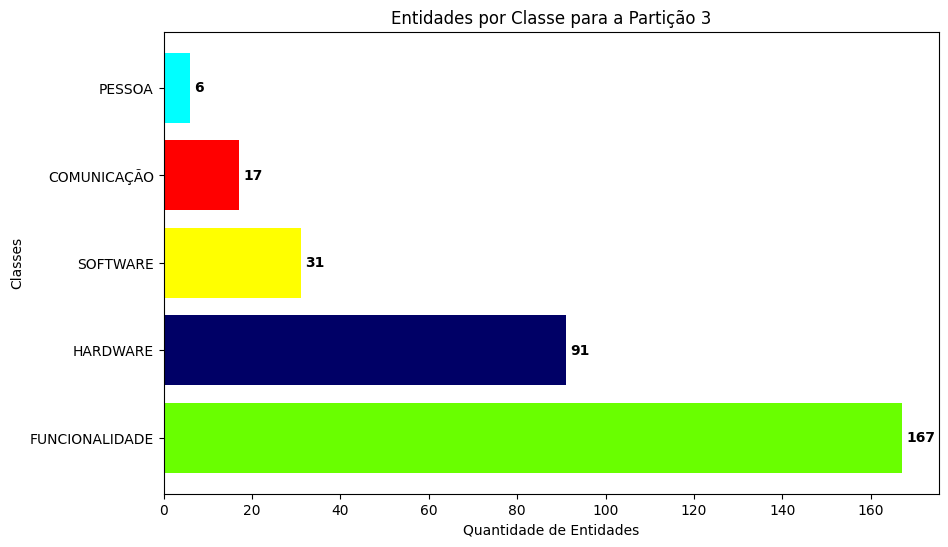

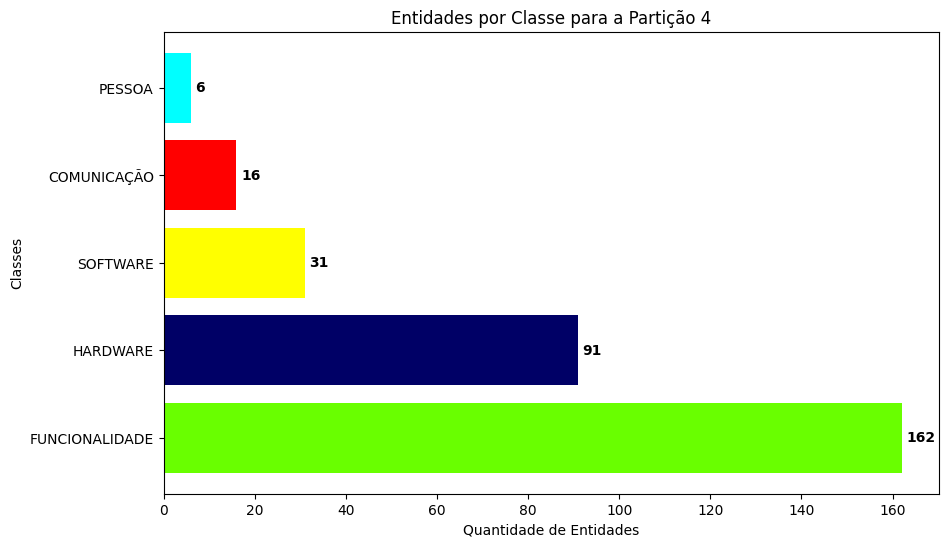

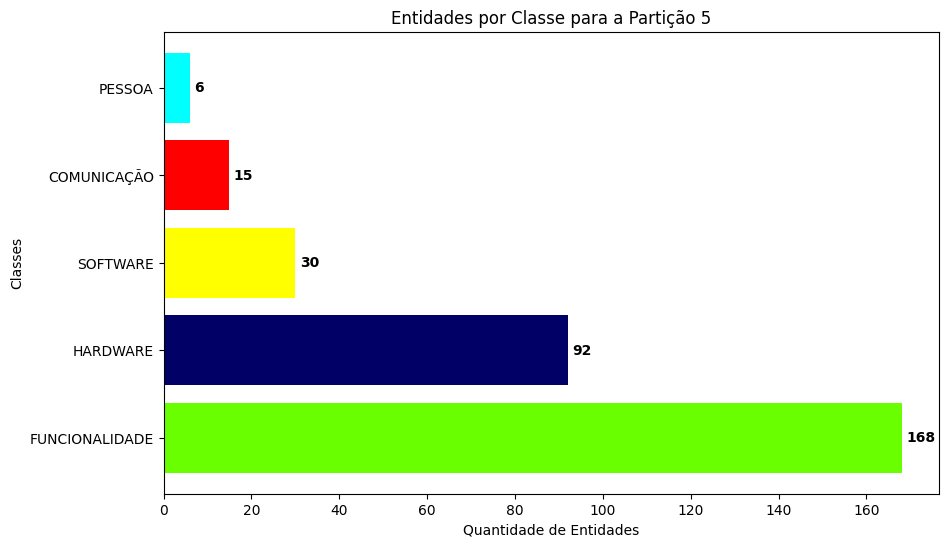

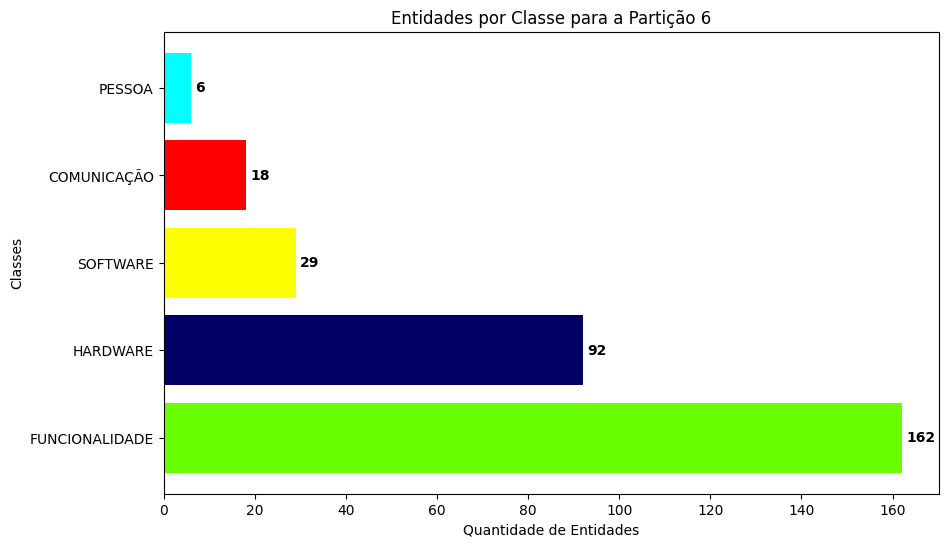

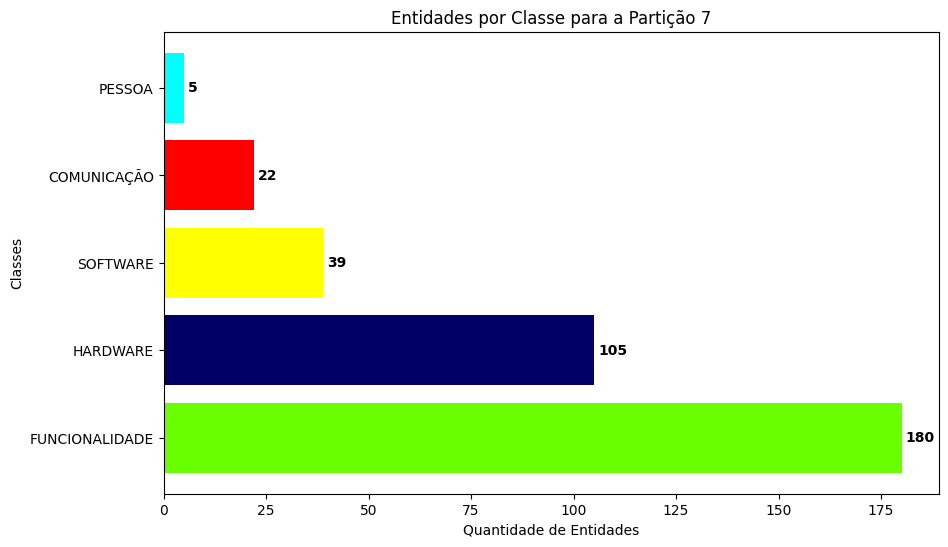

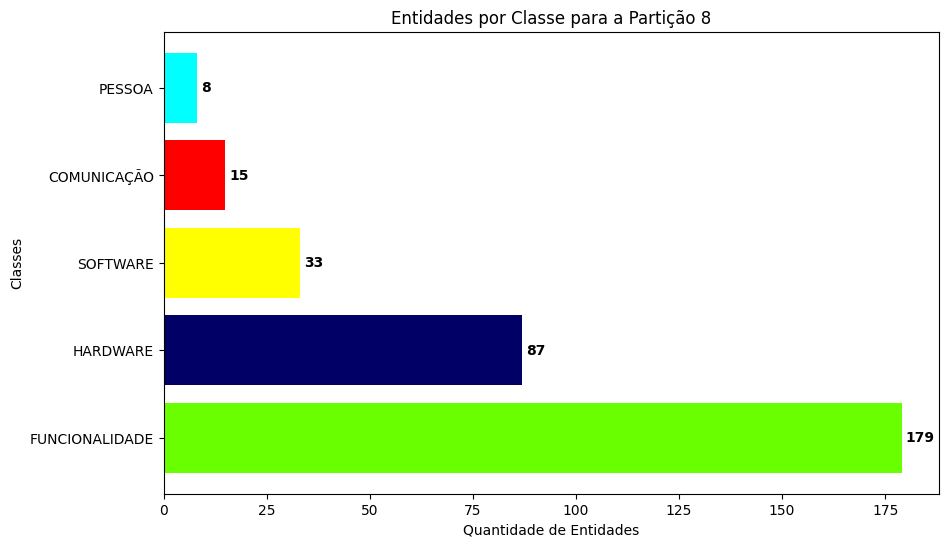

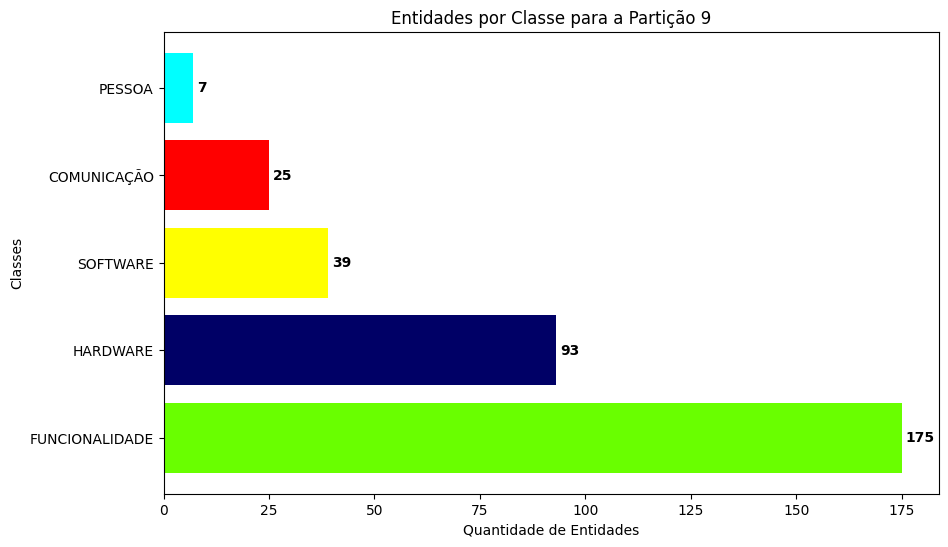

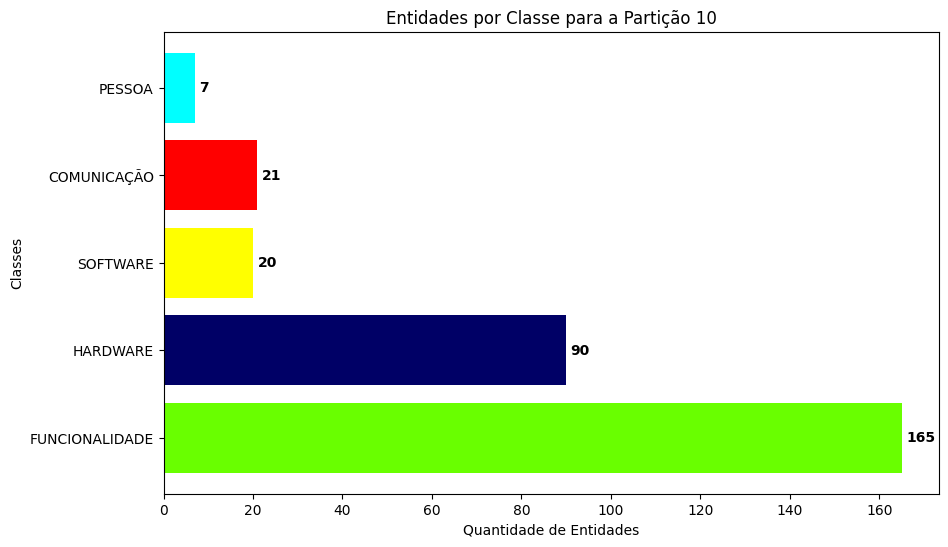

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv("../Dataset_Generator/final_dataset.csv", encoding='ISO-8859-1')

count_partition = 1
count_patent = 1

counters_partition = {'FUNCIONALIDADE': 0, 'HARDWARE': 0, 'SOFTWARE': 0, 'COMUNICAÇÃO': 0, 'PESSOA': 0}
counters_patent = {'FUNCIONALIDADE': 0, 'HARDWARE': 0, 'SOFTWARE': 0, 'COMUNICAÇÃO': 0, 'PESSOA': 0}
all_partitions = []

for data in dataset.values:
    current_patent = data[4]
    current_partition = data[5]

    if current_patent != count_patent:

        counters_patent = {key: 0 for key in counters_patent}

        count_patent += 1

    if current_partition != count_partition:
        plt.figure(figsize=(10, 6))
        plt.barh(list(counters_partition.keys()), list(counters_partition.values()), color=['#69ff00', '#000066', '#ffff00', '#ff0000', '#00ffff'])
        
        # Adicionar os valores das quantidades nas barras
        for index, value in enumerate(counters_partition.values()):
            plt.text(value + 1, index, str(value), va='center', color='black', fontweight='bold')

        plt.title(f'Entidades por Classe para a Partição {count_partition}')
        plt.xlabel('Quantidade de Entidades')
        plt.ylabel('Classes')
        plt.show()

        all_partitions.append(list(counters_partition.values()))
        counters_partition = {key: 0 for key in counters_partition}
        count_partition += 1
    
    if data[2] != 'O':
        if 'FUNCIONALIDADE' in data[2]: 
            counters_partition['FUNCIONALIDADE'] += 1
            counters_patent['FUNCIONALIDADE'] += 1
        elif 'HARDWARE' in data[2]: 
            counters_partition['HARDWARE'] += 1
            counters_patent['HARDWARE'] += 1
        elif 'SOFTWARE' in data[2]: 
            counters_partition['SOFTWARE'] += 1
            counters_patent['SOFTWARE'] += 1
        elif 'COMUNICAÇÃO' in data[2]: 
            counters_partition['COMUNICAÇÃO'] += 1
            counters_patent['COMUNICAÇÃO'] += 1
        elif 'PESSOA' in data[2]: 
            counters_partition['PESSOA'] += 1
            counters_patent['PESSOA'] += 1

if sum(counters_partition.values()) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(list(counters_partition.keys()), list(counters_partition.values()), color=['#69ff00', '#000066', '#ffff00', '#ff0000', '#00ffff'])

    # Adicionar os valores das quantidades nas barras
    for index, value in enumerate(counters_partition.values()):
        plt.text(value + 1, index, str(value), va='center', color='black', fontweight='bold')

    plt.title(f'Entidades por Classe para a Partição {count_partition}')
    plt.xlabel('Quantidade de Entidades')
    plt.ylabel('Classes')
    plt.show()

    all_partitions.append(list(counters_partition.values()))


In [10]:
average = np.mean(all_partitions, axis=0)
print(average)

[169.3  92.5  31.3  18.4   6.3]
